__Imports__

In [158]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot
import tensorflow_datasets as tfds

__Dataset__

In [218]:
digits = tf.keras.datasets.mnist.load_data(path='mnist.npz')
fashion = tf.keras.datasets.fashion_mnist.load_data()
cifar = tf.keras.datasets.cifar10.load_data()
(x_train_full,y_train_full),(x_test,y_test) = cifar
# ds = tfds.load('beans',shuffle_files=True)

__Batch_size=-1 to get the full dataset in NumPy arrays from the returned tf.Tensor object__

In [189]:
# beans = "beans"
# horse_or_human = "horses_or_humans"
# bee = "bee_dataset"
# rock_paper_scissors = "rock_paper_scissors"

__Beans__

In [190]:
# train = tfds.load(name=beans, split=tfds.Split.TRAIN, batch_size=-1 ,shuffle_files=True) 
# valid = tfds.load(name=beans, split=tfds.Split.VALIDATION, batch_size=-1)
# test = tfds.load(name=beans, split=tfds.Split.TEST, batch_size=-1,shuffle_files=True)

__Horse OR Human__

In [137]:
train = tfds.load(name=horse_or_human, split=tfds.Split.TRAIN, batch_size=-1 ,shuffle_files=True) 
# valid = tfds.load(name=beans, split=tfds.Split.VALIDATION, batch_size=-1)
test = tfds.load(name=horse_or_human, split=tfds.Split.TEST, batch_size=-1,shuffle_files=True)

In [216]:
# train = tfds.load(name=rock_paper_scissors, split=tfds.Split.TRAIN, batch_size=-1 ,shuffle_files=True) 
# test = tfds.load(name=rock_paper_scissors, split=tfds.Split.TEST, batch_size=-1,shuffle_files=True)

__tfds.as_numpy return a generator that yields NumPy array records out of a tf.data.Dataset__

In [217]:
# # size = round(len(train.get('label'))*0.80
# train = tfds.as_numpy(train)
# # # valid = tfds.as_numpy(train)
# test = tfds.as_numpy(test)

__Seperate the x and y__

In [90]:
len(train.get('label'))

1027

In [193]:
# x_train, y_train = train["image"], train["label"] 
# # x_valid, y_valid = x_train_full[size:],y_train_full[size:]
# x_test, y_test = test["image"], test["label"]

In [96]:
tfds.as_numpy(train)

{'image': array([[[[ 53,  55,  45],
          [ 46,  47,  40],
          [ 39,  40,  36],
          ...,
          [ 24,  25,  24],
          [ 21,  23,  21],
          [ 19,  21,  20]],
 
         [[ 41,  40,  34],
          [ 49,  48,  42],
          [ 54,  53,  48],
          ...,
          [ 18,  20,  19],
          [ 16,  18,  16],
          [ 16,  18,  16]],
 
         [[ 33,  29,  28],
          [ 50,  47,  42],
          [ 62,  58,  53],
          ...,
          [ 17,  19,  17],
          [ 15,  16,  14],
          [ 14,  15,  13]],
 
         ...,
 
         [[160, 143, 125],
          [162, 147, 129],
          [142, 128, 109],
          ...,
          [144, 124, 106],
          [141, 121, 104],
          [161, 141, 122]],
 
         [[142, 125, 107],
          [155, 134, 115],
          [153, 132, 113],
          ...,
          [149, 129, 113],
          [156, 134, 115],
          [163, 142, 123]],
 
         [[120, 101,  85],
          [123, 103,  87],
          [119, 101, 

In [194]:
# print("These are the Shapes of these Sets: \nTrain: {} \nValid: {} \nTest: {}".format(x_train.shape,x_valid.shape,x_test.shape))

These are the Shapes of these Sets: 
Train: (2520, 300, 300, 3) 
Valid: (133, 500, 500, 3) 
Test: (372, 300, 300, 3)


In [97]:
train

{'image': <tf.Tensor: shape=(1027, 300, 300, 3), dtype=uint8, numpy=
 array([[[[ 53,  55,  45],
          [ 46,  47,  40],
          [ 39,  40,  36],
          ...,
          [ 24,  25,  24],
          [ 21,  23,  21],
          [ 19,  21,  20]],
 
         [[ 41,  40,  34],
          [ 49,  48,  42],
          [ 54,  53,  48],
          ...,
          [ 18,  20,  19],
          [ 16,  18,  16],
          [ 16,  18,  16]],
 
         [[ 33,  29,  28],
          [ 50,  47,  42],
          [ 62,  58,  53],
          ...,
          [ 17,  19,  17],
          [ 15,  16,  14],
          [ 14,  15,  13]],
 
         ...,
 
         [[160, 143, 125],
          [162, 147, 129],
          [142, 128, 109],
          ...,
          [144, 124, 106],
          [141, 121, 104],
          [161, 141, 122]],
 
         [[142, 125, 107],
          [155, 134, 115],
          [153, 132, 113],
          ...,
          [149, 129, 113],
          [156, 134, 115],
          [163, 142, 123]],
 
         [[120,

In [ ]:
x)

In [178]:
y_train

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
train = tfds.load(name=horse_or_human, split=tfds.Split.TRAIN, batch_size=-1 ,shuffle_files=True) 

In [226]:
x_valid,x_train = x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test / 255.

In [228]:
x_train.shape

(45000, 32, 32, 3)

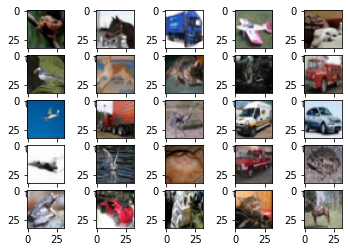

In [220]:
for i in range(25):
# define subplot
    pyplot.subplot(5, 5, i+1)
    # plot raw pixel data
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

__Clear the Backend__

In [222]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

__Piecewise Constant Scheduling__
* Added an additional learning constant
* A dynamic learning process

In [223]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 10:
        return 0.005
    elif epoch < 15:
        return 0.003
    elif epoch < 20:
        return 0.001
    else:
        return 0.0001

In [224]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn
piecewise_constant_fn = piecewise_constant([5,10,15,20,25], [0.01, 0.005,0.003,0.001,0.0001])

In [225]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

__Model Creation__

In [229]:
model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3),padding="valid" ,
#                               activation='selu',kernel_initializer="lecun_normal", input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3),padding="valid" ,
                              activation='selu',kernel_initializer="lecun_normal", input_shape=(32,32,3)))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3),padding="valid", 
                              activation='selu',kernel_initializer="lecun_normal"))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.GaussianDropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=120, activation='selu',kernel_initializer="lecun_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(units=84, activation='selu',kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(units=10, activation = 'softmax'))

In [230]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         168       
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 6)        0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 6)        24        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                        

In [231]:
# import visualkeras
# visualkeras.layered_view(model)

In [232]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, 'model.png', show_shapes=True)

__Model Compile__

In [233]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(clipvalue=1.0,clipnorm=1.0),metrics=["accuracy"])

__Model Fitting__

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=25,callbacks=[lr_scheduler])

Epoch 1/25
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4465 - accuracy: 0.4800 - val_loss: 1.3683 - val_accuracy: 0.5036 - lr: 0.0100
Epoch 2/25
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3638 - accuracy: 0.5130 - val_loss: 1.3538 - val_accuracy: 0.5178 - lr: 0.0100
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3033 - accuracy: 0.5366 - val_loss: 1.3175 - val_accuracy: 0.5344 - lr: 0.0100
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2707 - accuracy: 0.5502 - val_loss: 1.3087 - val_accuracy: 0.5354 - lr: 0.0100
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2404 - accuracy: 0.5652 - val_loss: 1.1933 - val_accuracy: 0.5852 - lr: 0.0100
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1266 - accuracy: 0.6031 - val_loss: 1.0400 - val_accuracy: 0.6312 - lr: 0.0050
Epoch 7/25
1407/1407 [==============================] - 7s

In [214]:
mse_test = model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 15ms/step - loss: 2.9003 - accuracy: 0.6559


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

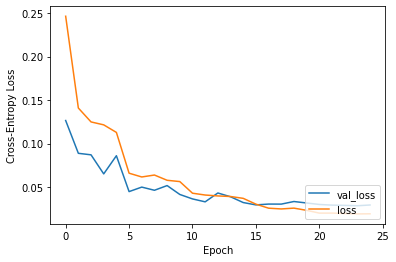

In [22]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='lower right')

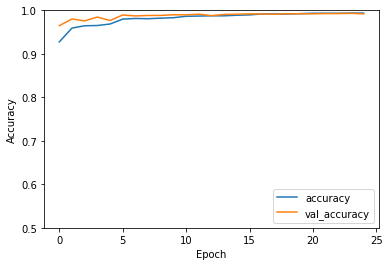

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [20]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [21]:
import sklearn.metrics as sk
hl = sk.hamming_loss(y_test, y_pred)
js = sk.jaccard_score(y_test, y_pred,average=None)
bss = sk.balanced_accuracy_score(y_test,y_pred)
mcc = sk.matthews_corrcoef(y_test,y_pred)
print("Hamming Loss: "+ str(hl))
print("Jaccard index \n"+ "0\t" + str(js[0]) +"\n" +  "1\t" + str(js[1]) + "\n" + "2\t" + str(js[2])+"\n" + "3\t" + str(js[2]) + 
     "\n"+"4\t"+str(js[3]) + "\n"+"5\t"+str(js[4]) +"\n"+"6\t"+str(js[5]) + "\n"+"7\t"+str(js[6]) + "\n"+"8\t"+str(js[7])
     + "\n"+"9\t"+str(js[8]))
print("Balanced Accuracy Score: " + str(bss))
print("Matthews Correlation Coefficient: "+ str(mcc))

Hamming Loss: 0.0067
Jaccard index 
0	0.9898682877406282
1	0.9912510936132983
2	0.9922779922779923
3	0.9922779922779923
4	0.9882237487733072
5	0.9848024316109423
6	0.9843924191750278
7	0.983402489626556
8	0.9845857418111753
9	0.9897645854657113
Balanced Accuracy Score: 0.9931711518302743
Matthews Correlation Coefficient: 0.9925535439751005
